In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('../results/mouse.celltype-specific_genes/protein-coding_w_dNdS/phastCons/phastcons-celltype.xlsx')

In [3]:
df

,Chromosome,Promoter_start,Promoter_end,num_phastCons,phastCons_coverage,min,max,range,Avg_phastCons,Variance,Standard_deviation,Celltype
0,chr17,47437377,47439376,2000,"2,000 (100.00%)",0.0,1.000000,1.000000,0.037299,0.018467,0.135892,Endothelia
1,chr11,83435677,83437676,1997,"1,997 (99.85%)",0.0,0.897638,0.897638,0.076421,0.025156,0.158607,Endothelia
2,chr7,29248467,29250218,1605,"1,605 (80.25%)",0.0,0.992126,0.992126,0.106139,0.026441,0.162606,Endothelia
3,chr9,50746537,50748536,2000,"2,000 (100.00%)",0.0,1.000000,1.000000,0.168182,0.096262,0.310262,Endothelia
4,chr6,50596633,50598632,1333,"1,333 (66.65%)",0.0,1.000000,1.000000,0.114660,0.037625,0.193971,Endothelia
...,...,...,...,...,...,...,...,...,...,...,...,...
5820,chr8,40421815,40423814,1826,"1,826 (91.30%)",0.0,0.997000,0.997000,0.070645,0.039816,0.199540,Oligodendrocyte
5821,chrX,48208879,48210878,2000,"2,000 (100.00%)",0.0,1.000000,1.000000,0.272193,0.128028,0.357810,Oligodendrocyte
5822,chr6,117861438,117862099,465,465 (23.25%),0.0,0.576000,0.576000,0.129288,0.021222,0.145679,Oligodendrocyte
5823,chr10,67912663,67914662,1966,"1,966 (98.30%)",0.0,1.000000,1.000000,0.306246,0.166110,0.407567,Oligodendrocyte


### Check whether phastCons are normally distributed

In [13]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [9]:
import seaborn as sns

In [14]:
matplotlib.rcParams['figure.dpi']= 300

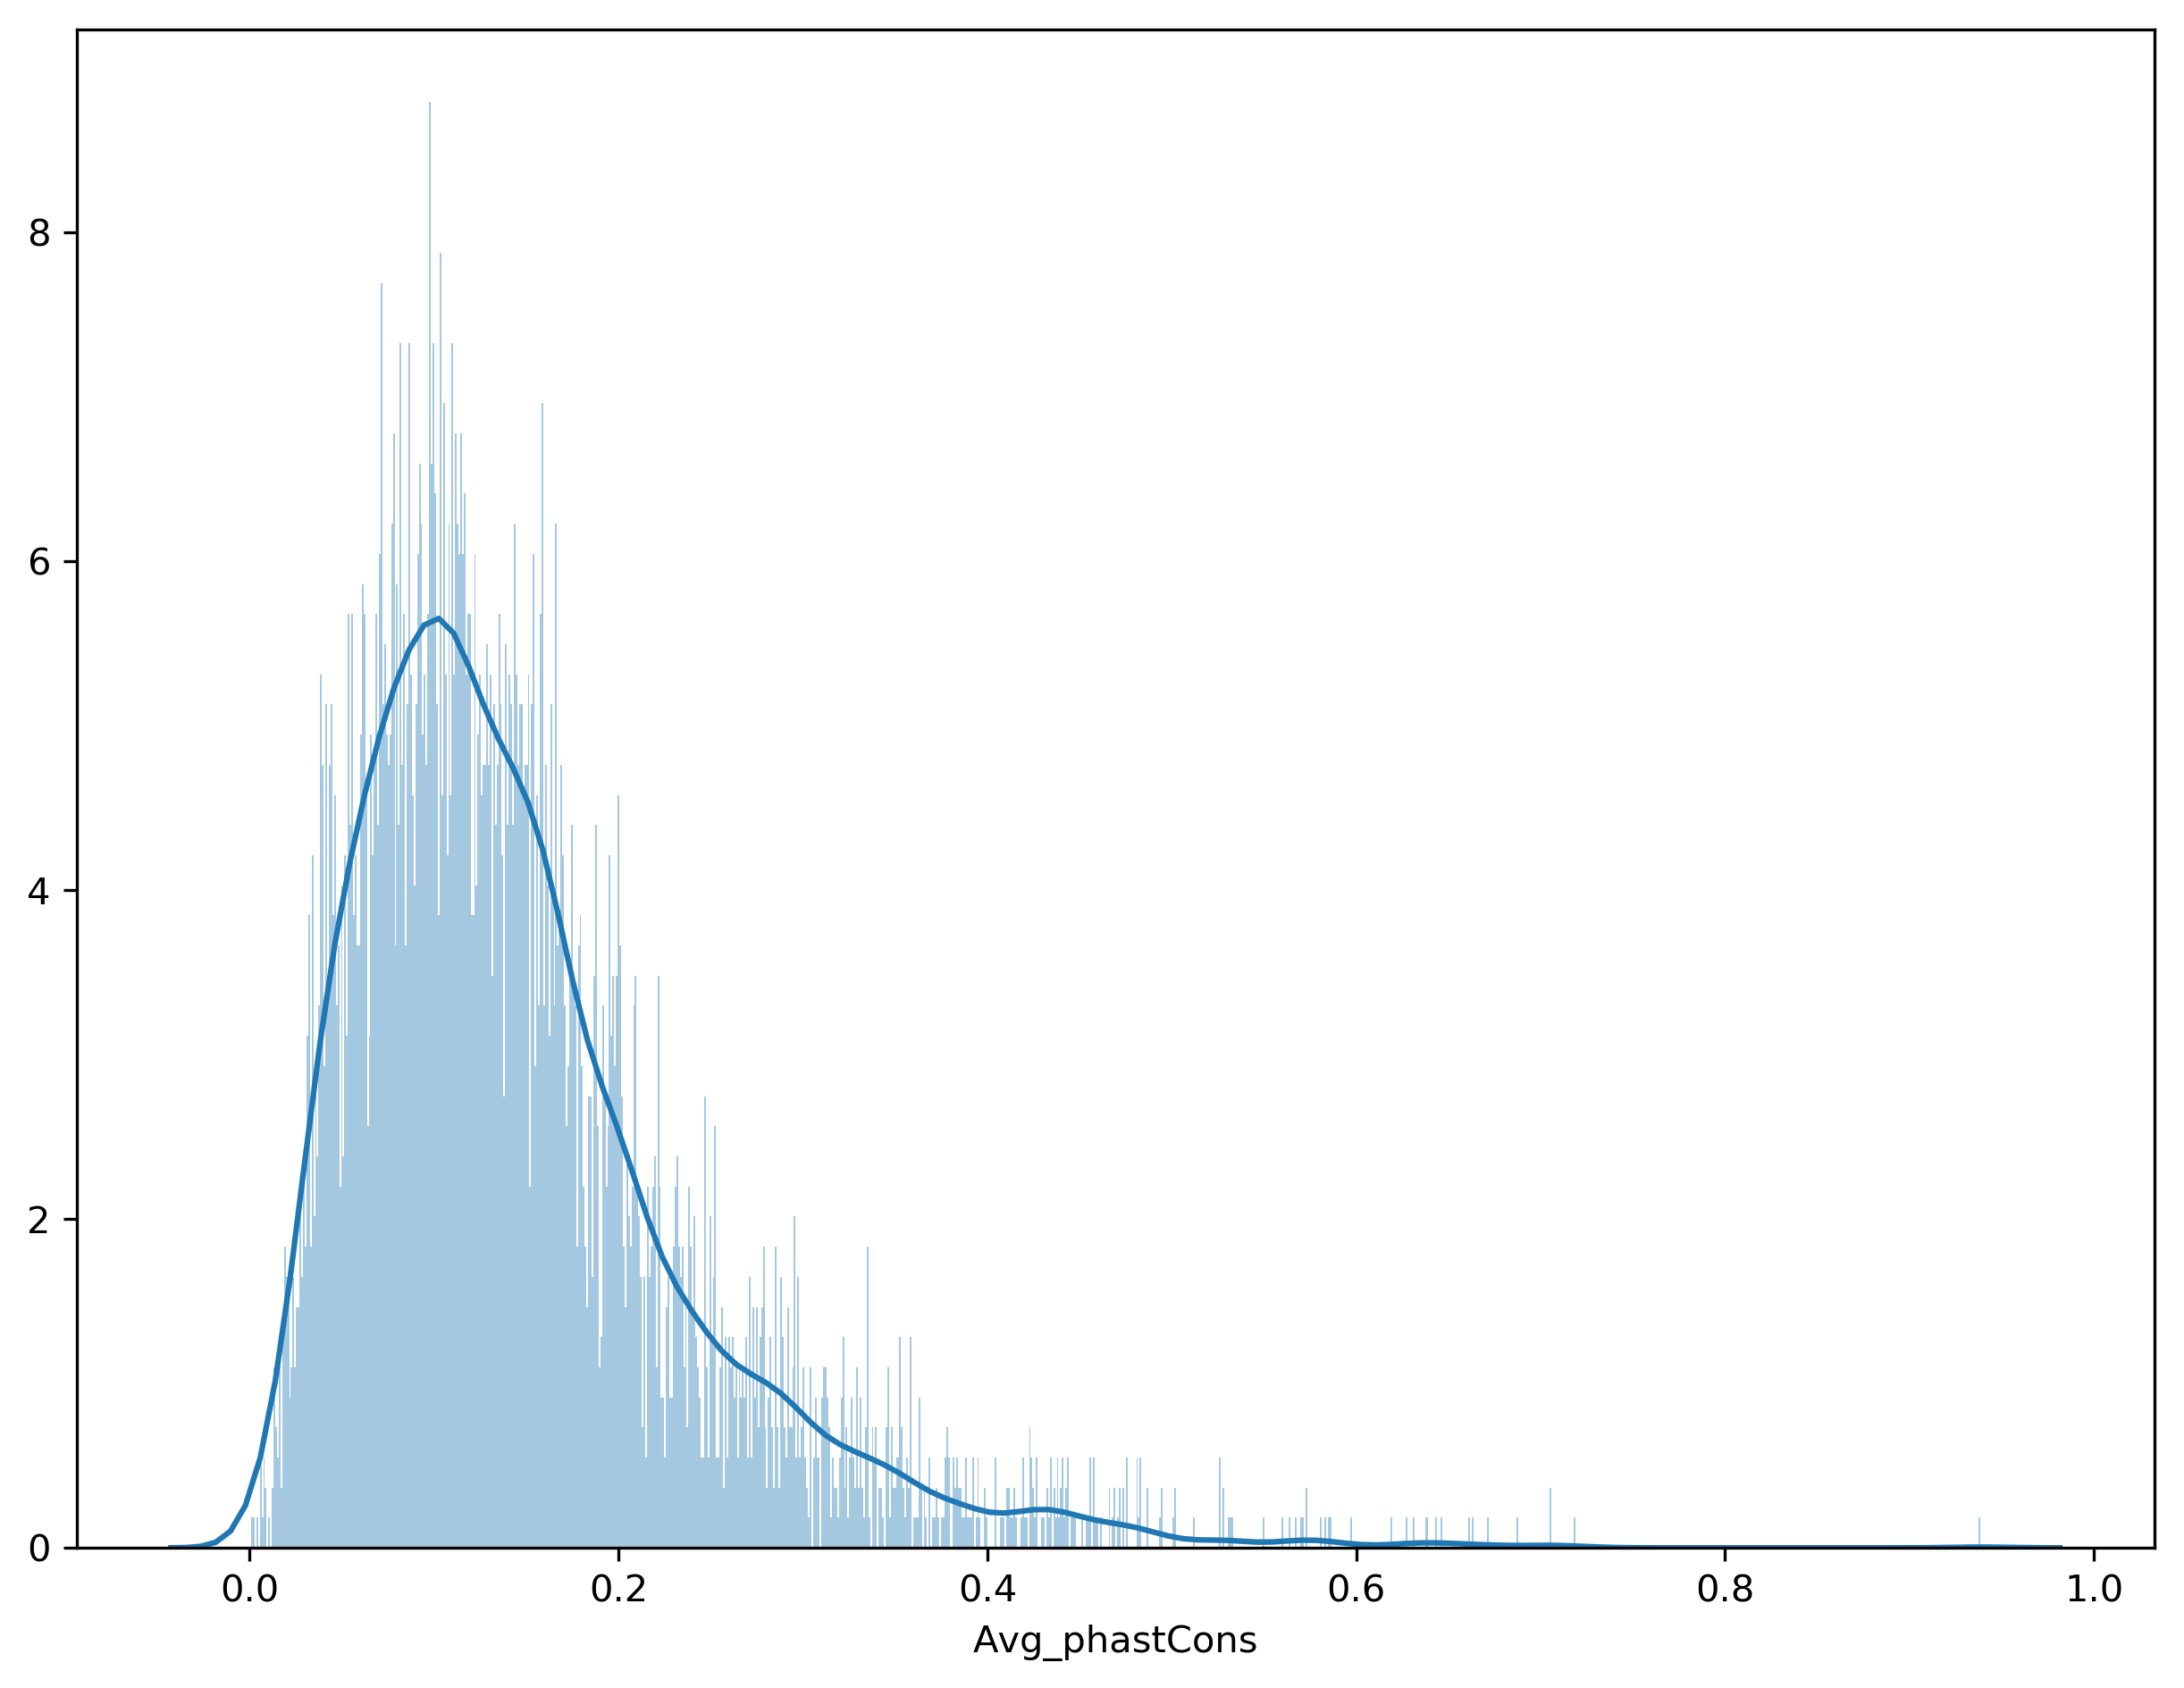

In [15]:
fig = plt.figure(figsize=(10,7.5))
ax = fig.add_subplot()
ax = sns.distplot(df['Avg_phastCons'],bins=1000)
# _=ax.set(xscale='log')
plt.show()

In [18]:
import statsmodels.api as sm
import pylab

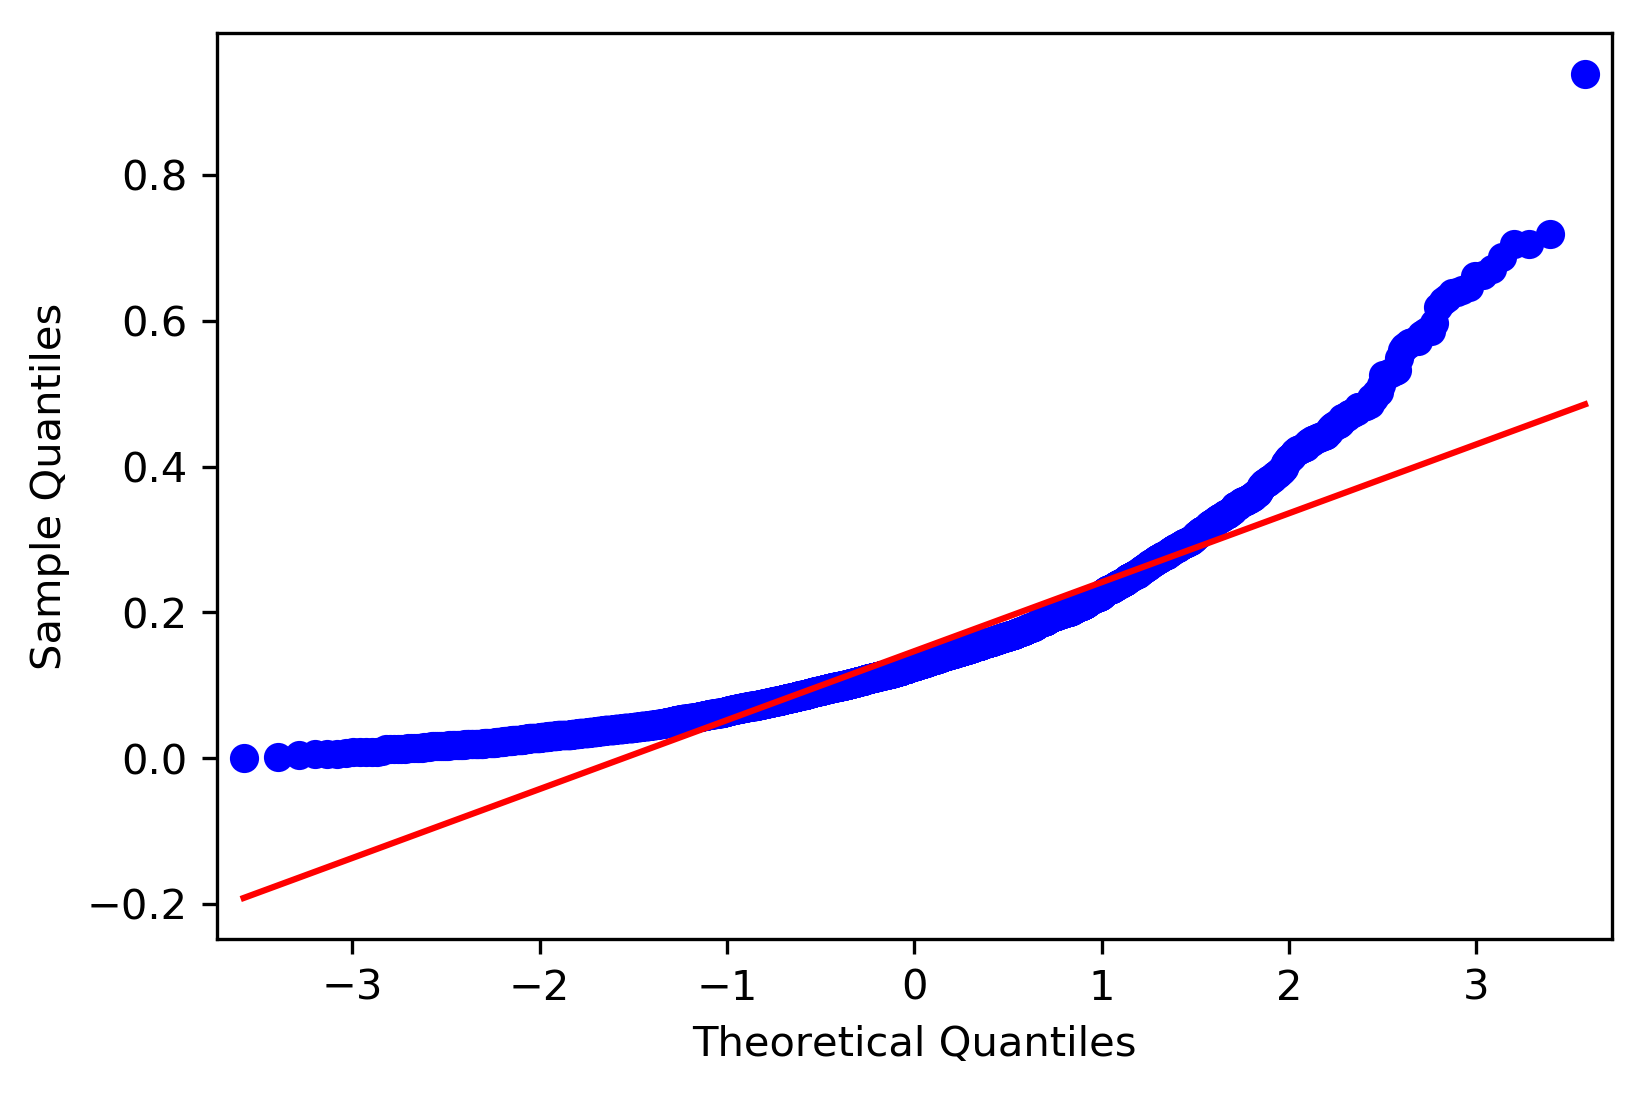

In [20]:
sm.qqplot(df['Avg_phastCons'], line='s')
pylab.show()

We see that phastCons are not normally distributed. Non-parametric approaches will be used for analyzing phastCons. 

In [21]:
palette={'Endothelia':'tab:blue','Glia':'tab:green','Neuron':'tab:red','Oligodendrocyte':'lightblue','Astrocyte':'lightgreen','Microglia':'tab:orange'}

In [26]:
from statannot import add_stat_annotation

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Neuron v.s. Endothelia: Mann-Whitney-Wilcoxon test two-sided P_val=4.082e-02 U_stat=6.328e+05
Endothelia v.s. Glia: Mann-Whitney-Wilcoxon test two-sided P_val=4.661e-01 U_stat=5.729e+05
Neuron v.s. Glia: Mann-Whitney-Wilcoxon test two-sided P_val=3.004e-03 U_stat=8.319e+05


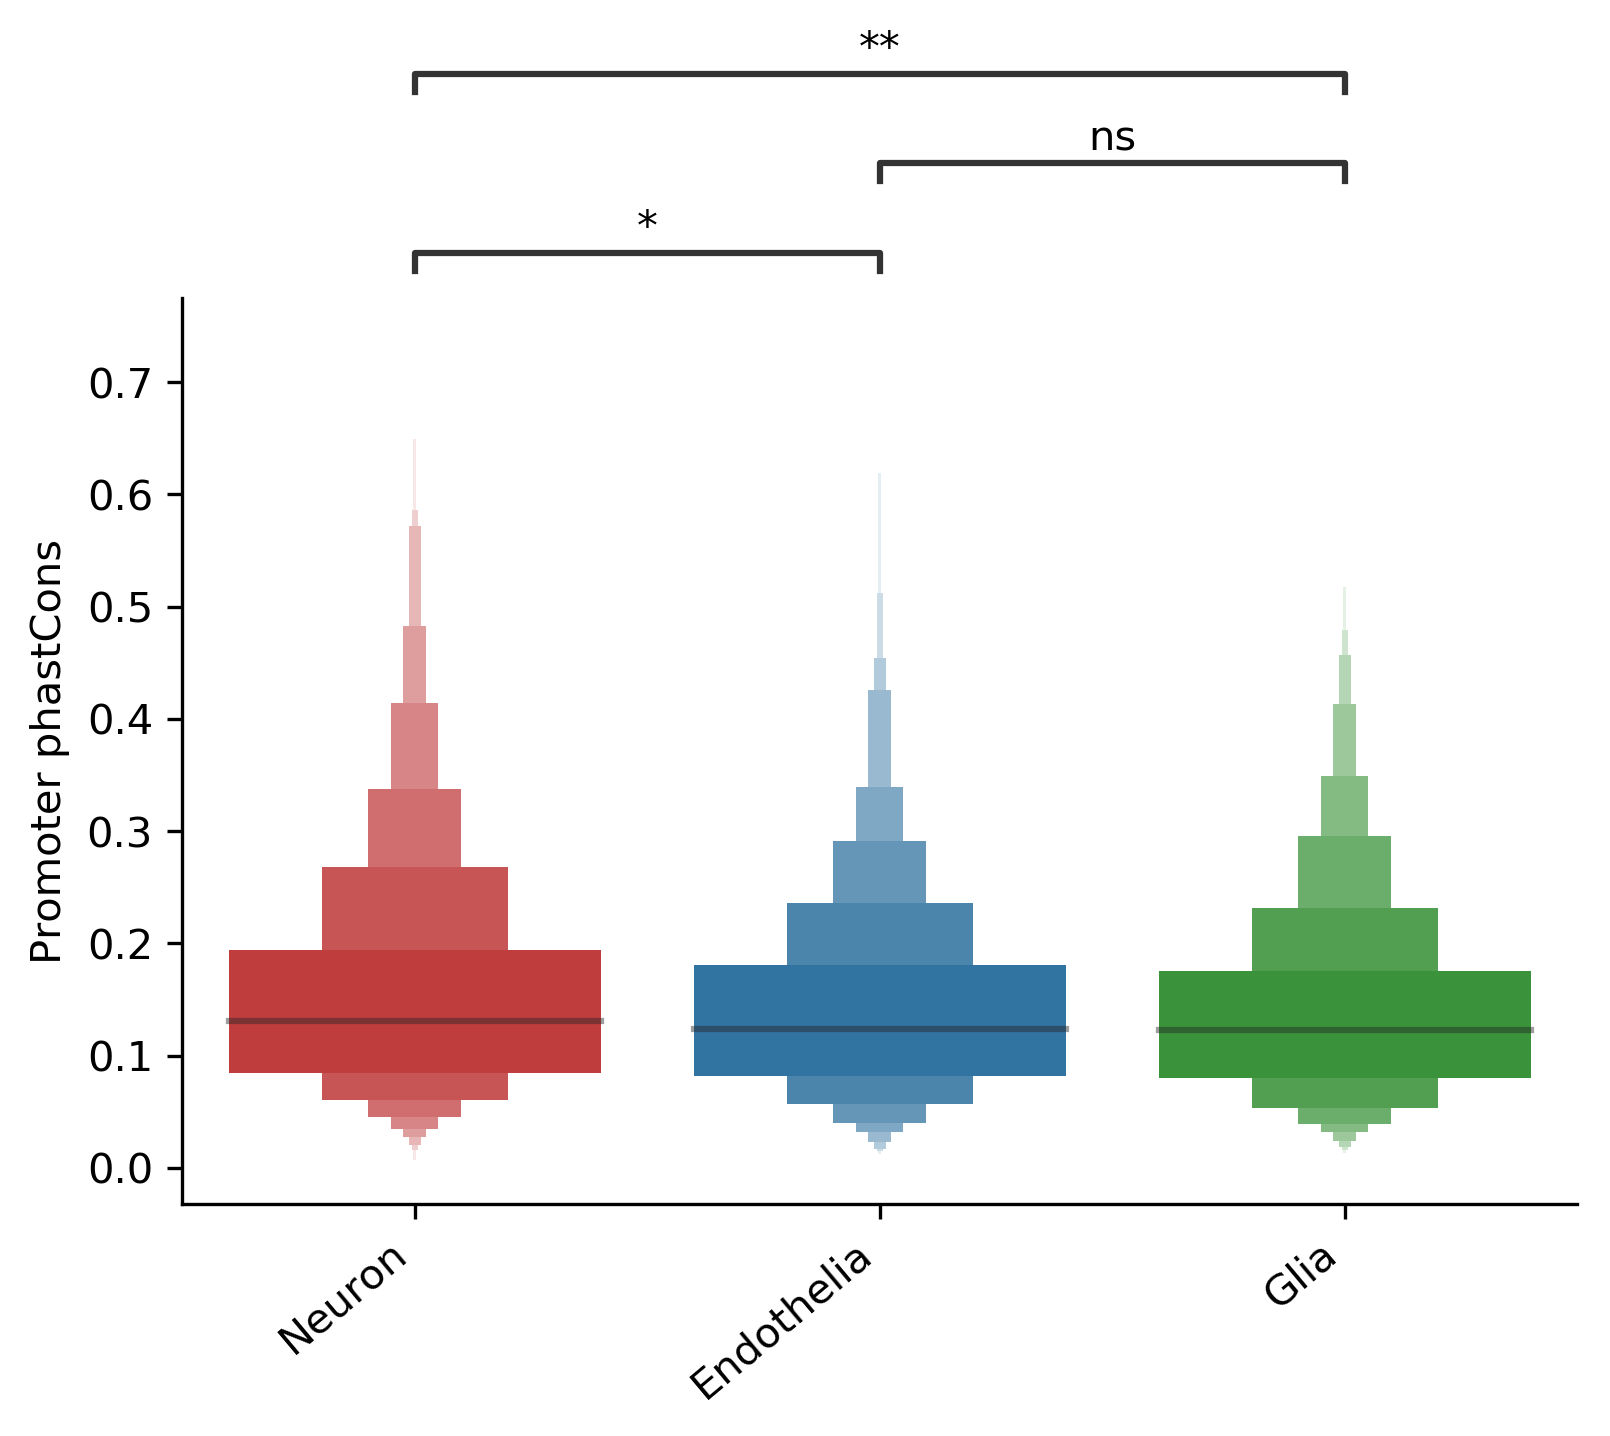

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set(yscale='log')
# ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='Avg_phastCons',
                 data=df[df['Celltype'].isin(['Neuron','Glia','Endothelia'])],
                 palette=palette,showfliers=False,outlier_prop=0,
                 order=['Neuron','Endothelia','Glia'])

# order=['Astrocyte','Neuron','Endothelia','Oligodendrocyte','Microglia','Glia']

ax.set(ylabel='Promoter phastCons',xlabel='')
sns.despine()
stats = add_stat_annotation(ax=ax,data=df,x="Celltype", y="Avg_phastCons",
                        box_pairs=[("Endothelia", "Neuron"),
                                   ("Endothelia", "Glia"),
                                   ("Glia","Neuron")],
                        test='Mann-Whitney', text_format='star',
                        loc='outside', verbose=2, 
                        order=['Neuron','Endothelia','Glia'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# plt.autoscale()
# plt.savefig('../figures/MannWhitney/mouse_reference_genome/all_92species.pdf')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Astrocyte v.s. Neuron: Mann-Whitney-Wilcoxon test two-sided P_val=5.240e-01 U_stat=5.380e+05
Neuron v.s. Oligodendrocyte: Mann-Whitney-Wilcoxon test two-sided P_val=3.442e-02 U_stat=3.529e+05
Neuron v.s. Microglia: Mann-Whitney-Wilcoxon test two-sided P_val=2.158e-02 U_stat=7.225e+05


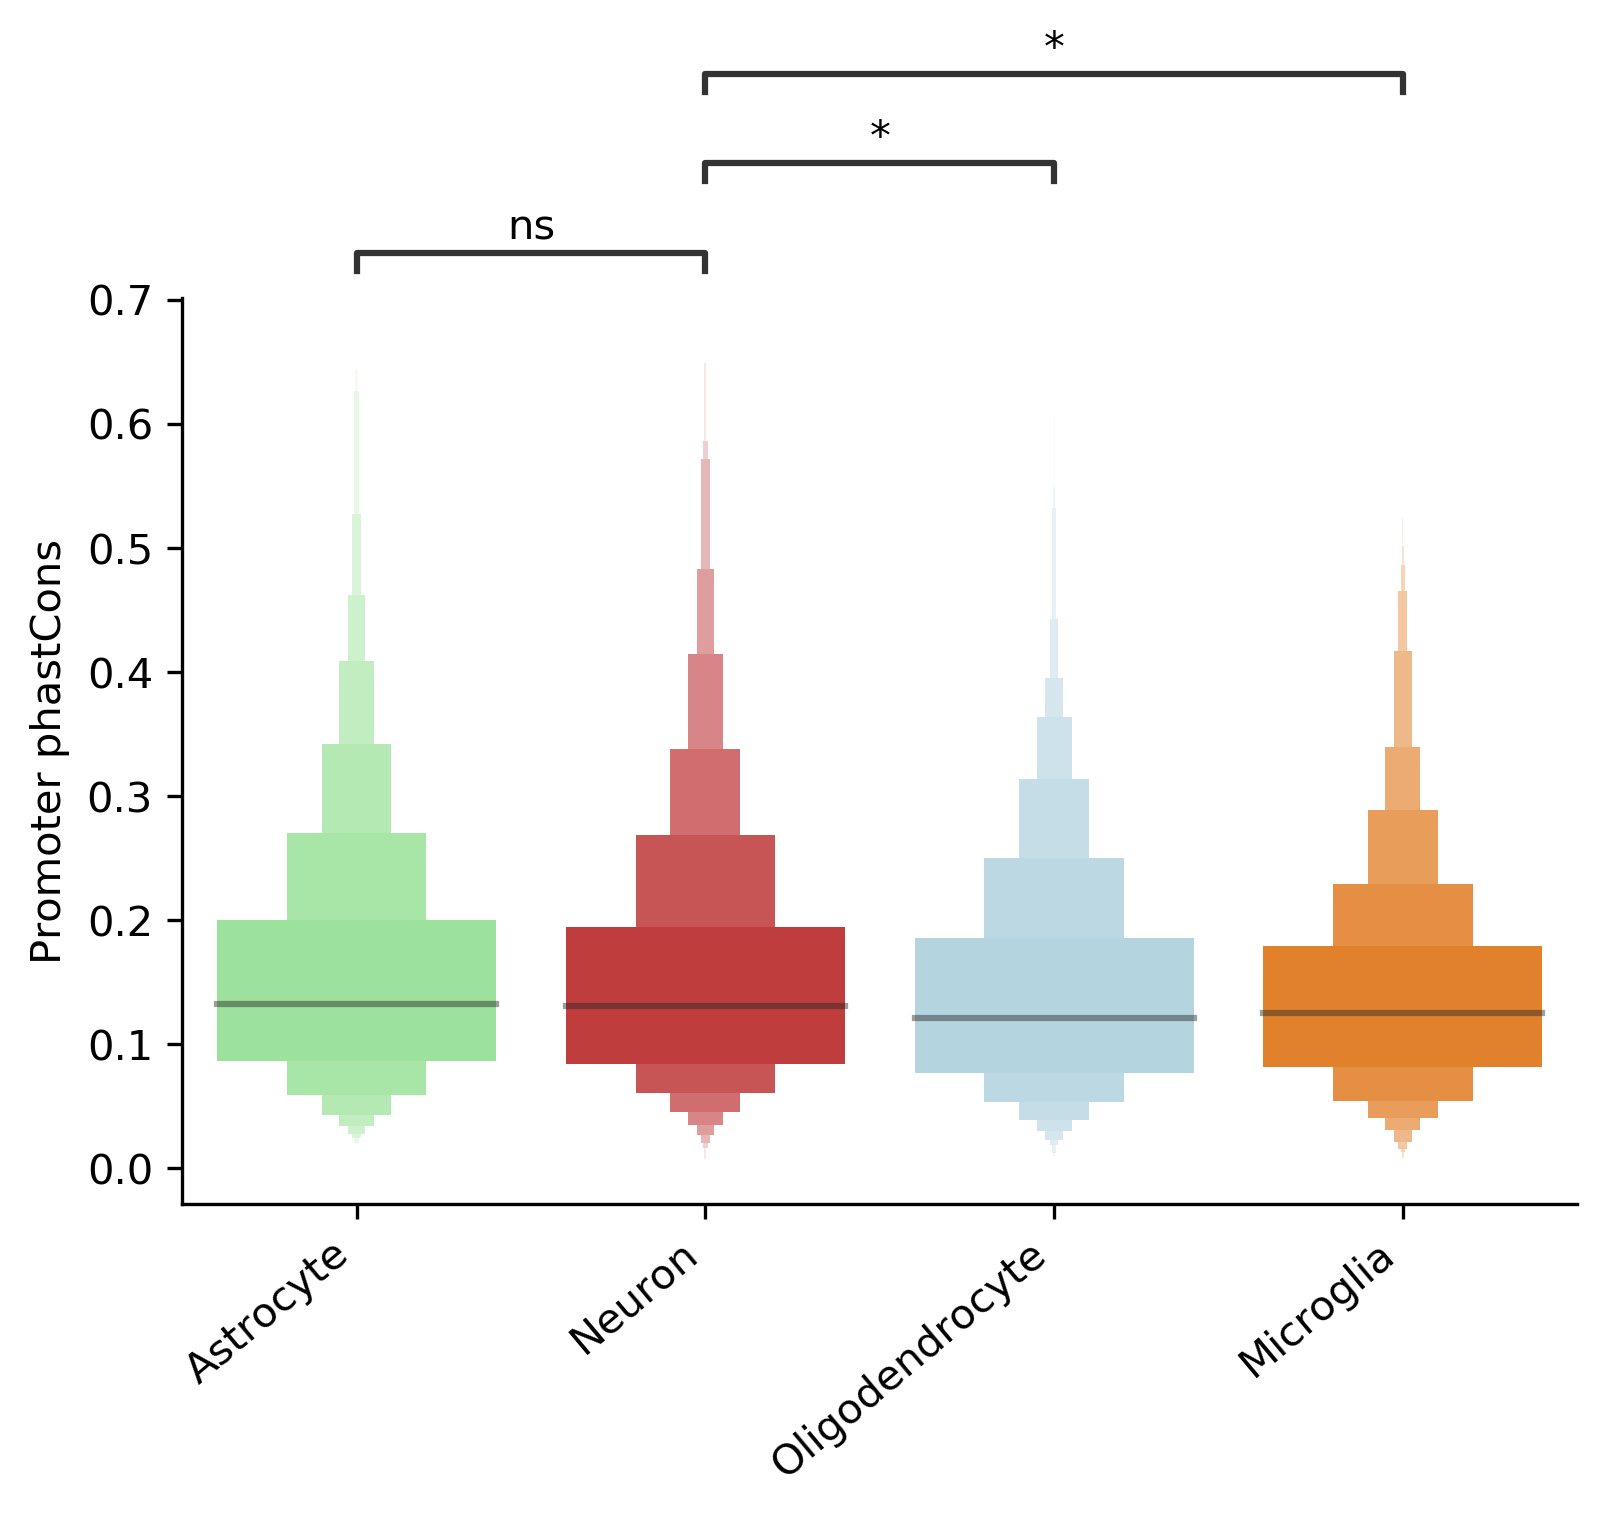

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
# ax.set(yscale='log')
# ax.set_ylim(0.0008,6)

ax=sns.boxenplot(x='Celltype',y='Avg_phastCons',
                 data=df[df['Celltype'].isin(['Neuron','Astrocyte','Oligodendrocyte','Microglia'])],
                 palette=palette,showfliers=False,outlier_prop=0,
                 order=['Astrocyte','Neuron','Oligodendrocyte','Microglia'])

# order=['Astrocyte','Neuron','Endothelia','Oligodendrocyte','Microglia','Glia']

ax.set(ylabel='Promoter phastCons',xlabel='')
sns.despine()
stat_annot = add_stat_annotation(ax=ax,data=df,x="Celltype", y="Avg_phastCons",
                        box_pairs=[("Astrocyte", "Neuron"),
                                   ("Neuron", "Oligodendrocyte"),
                                   ("Neuron","Microglia")],
                        test='Mann-Whitney', text_format='star',
                        loc='outside', verbose=2, 
                        order=['Astrocyte','Neuron','Oligodendrocyte','Microglia'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# plt.autoscale()
# plt.savefig('../figures/MannWhitney/mouse_reference_genome/all_92species.pdf')
plt.show()

In [43]:
from scipy import stats

In [44]:
stats.kruskal(df[df['Celltype']=='Neuron']['Avg_phastCons'],
              df[df['Celltype']=='Endothelia']['Avg_phastCons'],
              df[df['Celltype']=='Astrocyte']['Avg_phastCons'],
              df[df['Celltype']=='Microglia']['Avg_phastCons'],
              df[df['Celltype']=='Oligodendrocyte']['Avg_phastCons'])

KruskalResult(statistic=13.68295924648318, pvalue=0.008378787378192627)

In [46]:
stats.kruskal(df[df['Celltype']=='Neuron']['Avg_phastCons'],
              df[df['Celltype']=='Endothelia']['Avg_phastCons'],
              df[df['Celltype']=='Glia']['Avg_phastCons'])

KruskalResult(statistic=9.45514196095685, pvalue=0.008847936769973523)